In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

# Load NYC PLUTO-compatible data from NYC Open Data (Assessed Values by Property)
pluto_url = "https://data.cityofnewyork.us/resource/64uk-42ks.csv"
pluto = pd.read_csv(pluto_url)

# Display the first few rows to confirm successful loading and inspect structure
pluto.head()


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes,bct2020,bctcb2020
0,BK,7604,47,314,752.0,1004,22,45,11210,L156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3075200,30752001004
1,BK,1304,1,309,323.0,3002,17,35,11225,E280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3032300,30323003002
2,BK,1304,58,309,323.0,3001,17,35,11225,E280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3032300,30323003001
3,BK,1294,1,309,325.0,3000,17,35,11225,E280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3032500,30325003000
4,BK,1302,1,309,325.0,3001,17,35,11225,E280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3032500,30325003001


In [6]:
pluto['assesstot'] = pluto['assesstot'].fillna(pluto['assesstot'].median())
pluto['numfloors'] = pluto['numfloors'].fillna(pluto['numfloors'].median())


This code is part of a **data cleaning process** in pandas, specifically handling **missing values** (i.e., `NaN`s) in a dataset.

---

###  What This Code Does:

```python
pluto['assesstot'] = pluto['assesstot'].fillna(pluto['assesstot'].median())
```

- **`pluto['assesstot']`**: Refers to the column containing total assessed property value.
- **`.fillna(...)`**: Fills in any missing (`NaN`) values in the column.
- **`pluto['assesstot'].median()`**: Calculates the median value of the non-missing values in that column.
- **Assignment (`=`)**: Replaces the original column with the cleaned one.

The second line does the exact same thing for the **`numfloors`** (number of floors) column.

---

###  Why Use the Median?

- The **median** is more robust to outliers than the mean.
- In urban data, values like `assesstot` and `numfloors` often have **right-skewed distributions**.
- Median imputation ensures missing values don’t skew the distribution heavily.

---

###  Example Use Case:

Let’s say your data looks like this before:

| lotarea | numfloors | assesstot |
|---------|-----------|-----------|
| 2000    | 2         | 500000    |
| 3500    | **NaN**   | 750000    |
| 10000   | 5         | **NaN**   |

After running:
```python
pluto['assesstot'] = pluto['assesstot'].fillna(pluto['assesstot'].median())
pluto['numfloors'] = pluto['numfloors'].fillna(pluto['numfloors'].median())
```

The result would be:

| lotarea | numfloors | assesstot |
|---------|-----------|-----------|
| 2000    | 2         | 500000    |
| 3500    | 2         | 750000    |
| 10000   | 5         | 625000    | ← filled with median



In [7]:
# Feature Engineering
pluto['FAR'] = pluto['bldgarea'] / pluto['lotarea']
pluto['volume_est'] = pluto['lotarea'] * pluto['numfloors']
pluto['decade_built'] = (pluto['yearbuilt'] // 10) * 10

This code block performs **feature engineering**, which means you're creating **new variables** from existing ones to extract more useful insights for urban analysis or modeling.

---

##  Line-by-Line Breakdown

---

###  `pluto['FAR'] = pluto['bldgarea'] / pluto['lotarea']`

 **Creates: Floor Area Ratio (FAR)**  
- **FAR = Total building floor area ÷ Lot area**
- A key urban planning metric used to measure **density and intensity of development**

####  Example:
- A building with 6,000 sq ft total floor area on a 2,000 sq ft lot has a FAR of `3.0`
- Higher FARs = more built-up or vertically dense areas (like Manhattan)
- Zoning laws often restrict FAR (e.g., max FAR = 4.0 in a medium-density zone)

---

###  `pluto['volume_est'] = pluto['lotarea'] * pluto['numfloors']`

 **Creates: Estimated Building Volume**  
- A rough proxy for **building mass or capacity**
- Assumes that each floor uses the full lot footprint (not always true, but useful approximation)

####  Why it’s useful:
- Useful for **daylight analysis**, **wind modeling**, or **construction cost proxies**

---

###  `pluto['decade_built'] = (pluto['yearbuilt'] // 10) * 10`

 **Creates: Decade built**  
- Groups buildings by **decade of construction** (e.g., 1960s, 1980s, etc.)
- Allows you to **categorize** and visualize building age patterns

####  Why it's important:
- Helps identify **historic patterns** of development
- Useful for evaluating **infrastructure age**, **building codes compliance**, or **retrofit needs**

---

##  Why Do This?

Feature engineering like this:
| Adds Value | Enables |
|------------|---------|
| Meaningful metrics | Urban density & zoning analysis |
| Simplified categories | Grouping and visual storytelling |
| Derived quantities | Modeling, regression, clustering |


/var/folders/vx/d27_r9zn3q92qt0_lvm7zmb80000gn/T/ipykernel_40678/702217922.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


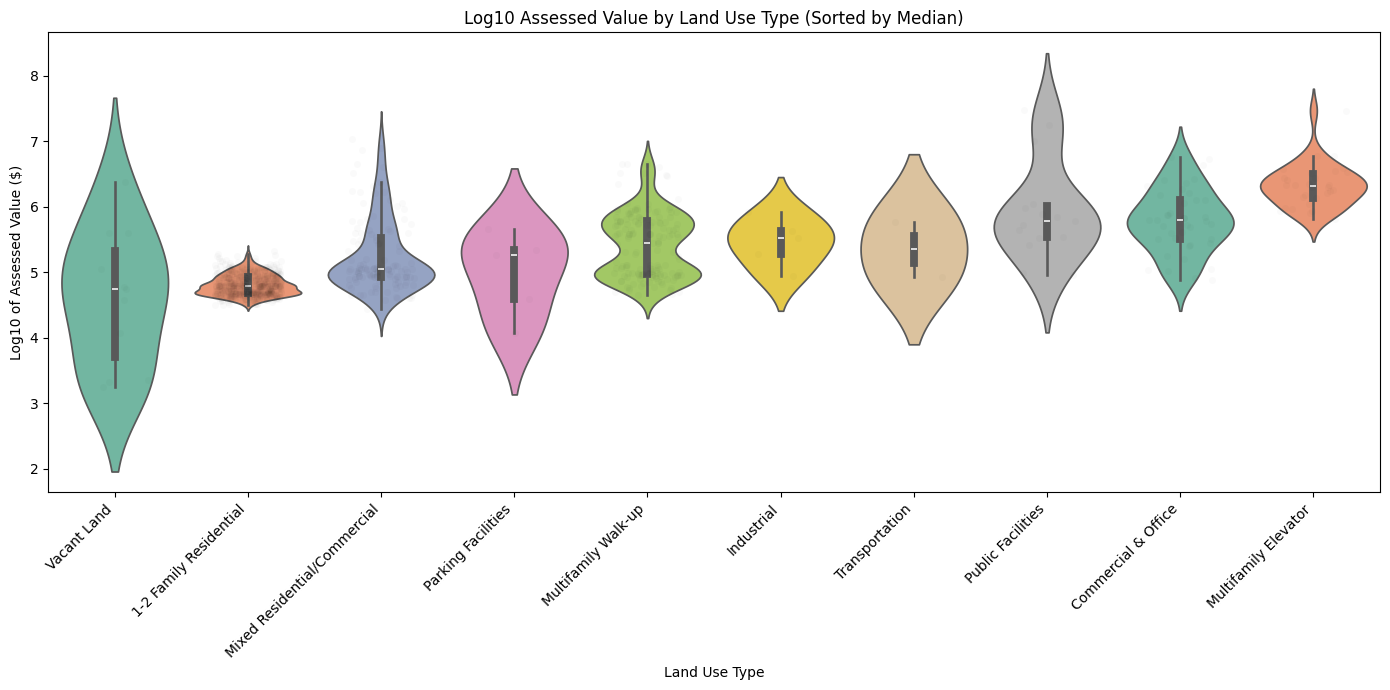

In [15]:
# Map numeric landuse codes to readable labels
landuse_map = {
    1: '1-2 Family Residential',
    2: 'Multifamily Walk-up',
    3: 'Multifamily Elevator',
    4: 'Mixed Residential/Commercial',
    5: 'Commercial & Office',
    6: 'Industrial',
    7: 'Transportation',
    8: 'Public Facilities',
    9: 'Open Space',
    10: 'Parking Facilities',
    11: 'Vacant Land'
}

# Ensure landuse is numeric (just in case)
pluto['landuse'] = pd.to_numeric(pluto['landuse'], errors='coerce')
pluto = pluto[pluto['landuse'].isin(landuse_map.keys())]
pluto['landuse_label'] = pluto['landuse'].map(landuse_map)

# Filter out zero or negative assessed values before log transformation
pluto = pluto[pluto['assesstot'] > 0]
pluto['log_assesstot'] = np.log10(pluto['assesstot'])

# Sort land use labels by median assessed value
median_vals = pluto.groupby('landuse_label')['assesstot'].median().sort_values()
ordered_labels = median_vals.index.tolist()

# Plot
plt.figure(figsize=(14, 7))
sns.violinplot(
    x='landuse_label',
    y='log_assesstot',
    data=pluto,
    order=ordered_labels,
    palette='Set2'
)
sns.stripplot(
    x='landuse_label',
    y='log_assesstot',
    data=pluto,
    order=ordered_labels,
    color='black',
    alpha=0.02,
    jitter=0.25
)
plt.xticks(rotation=45, ha='right')
plt.title("Log10 Assessed Value by Land Use Type (Sorted by Median)")
plt.ylabel("Log10 of Assessed Value ($)")
plt.xlabel("Land Use Type")
plt.tight_layout()
plt.show()


This violin plot shows the **log-transformed assessed property values (`log10(assesstot)`)** across different **land use types**, sorted by **median value**.

---

##  How to Interpret This Plot

###  X-Axis – **Land Use Types**
Each label represents a land use category from NYC PLUTO data:
- Ranges from low-density residential (e.g., *1-2 Family Residential*) to commercial and multifamily buildings.
- Sorted left-to-right by **median assessed value**.

###  Y-Axis – **Log₁₀(Assessed Value in $)**
- This axis shows the **log base 10 of the total assessed value**.
- Example:  
  - A value of **6** means ~$1 million (10⁶)  
  - A value of **7** means ~$10 million (10⁷)

---

##  Key Observations:

### **1. Multifamily Elevator & Commercial/Office = High Value**
- These two have the **highest median and upper range** of assessed values.
- Reflects large-scale development, often in dense urban cores.

###  **2. Vacant Land = Broad Distribution**
- Wide violin shape shows **high variation** — some parcels are valued very low, others extremely high (likely in Manhattan or development zones).
- May include speculation or zoning-influenced pricing.

###  **3. 1-2 Family Residential = Low & Narrow**
- Tightly clustered around log₁₀ values of ~4.7–5.0 (i.e., ~$50K–$100K).
- Indicates valuation consistency and low density.

###  **4. Industrial & Public Facilities = Moderate Spread**
- Have some high-valued outliers, but median is lower than dense residential or commercial land.

###  **5. Parking & Mixed Use = Middle Ground**
- These land use types show moderately valued distributions and wide variance, reflecting mixed zoning patterns.

---

##  Why Log Transformation?
- Original assessed values were skewed, with extreme outliers.
- Taking `log10` compresses the scale and improves interpretability of:
  - Central tendency
  - Spread
  - Comparisons between land use types

---

##  Urban Planning Implications:
- **Zoning and land use directly influence property value**.
- **Vacant land with high valuation** suggests intense development pressure.
- **Consistent residential pricing** helps predict revenue from property taxes.
- **Comparing density vs value** helps guide **rezoning** or **public investment**.



In [20]:
filtered = pluto[pluto['numfloors'] > 0]

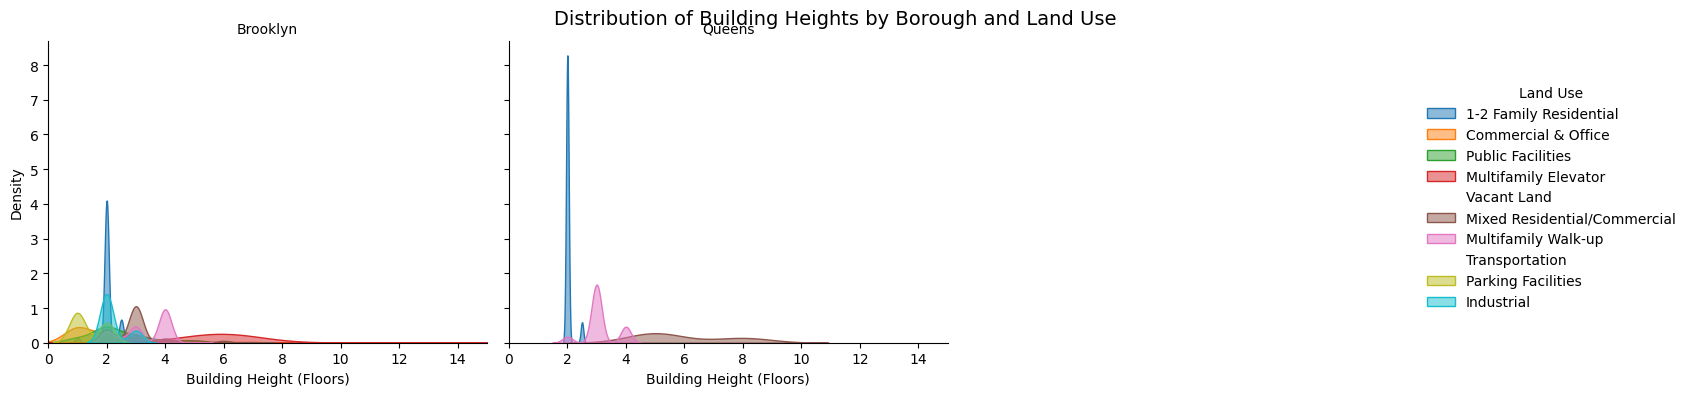

In [21]:
g = sns.FacetGrid(
    filtered,
    col='borough',
    hue='landuse_label',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharex=True,
    sharey=True,
    palette='tab10'
)
g.map(sns.kdeplot, 'numfloors', fill=True, alpha=0.5, bw_adjust=0.7, warn_singular=False)
g.add_legend(title="Land Use")
g.set(xlim=(0, 15), xlabel='Building Height (Floors)', ylabel='Density')
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Building Heights by Borough and Land Use", fontsize=14)
plt.show()


This plot is a **Kernel Density Estimate (KDE) FacetGrid** showing the distribution of **building heights (`numfloors`) by land use type**, separated by borough — in this case, **Brooklyn** and **Queens** only.

---

##  What You're Looking At:

###  **Plot Type:**  
- **KDE** = smoothed density curves showing the relative frequency of values.
- **Faceted by borough** (`col='borough'`)
- **Colored by land use type** (`hue='landuse_label'`)

###  **X-axis:**  
- `numfloors` — the number of floors (building height)

###  **Y-axis:**  
- `Density` — shows the estimated distribution shape (higher = more buildings with that height)

---

##  Interpretation (by borough):

###  **Brooklyn:**
- **1-2 Family Residential** (blue): Strong peak at **2 floors**, very common low-rise housing.
- **Multifamily Walk-up** (pink): Broader distribution with clusters around **3–6 floors**.
- **Industrial & Public Facilities**: Smaller peaks, typically 1–2 floors.
- Mixed use and Commercial: Lower density and wider variance.

###  **Queens:**
- **1-2 Family Residential** (blue): Also dominates, very tight peak at **2 floors**.
- **Multifamily Walk-up**: Shows a spread from **3 to 6 floors**, similar to Brooklyn.
- **Fewer visible curves** for other land use types, likely due to data size limits or filtering.

---

##  Why Only Two Boroughs Appear?

1. **Other boroughs** (Manhattan, Bronx, Staten Island) likely had:
   - No variation in `numfloors` for some land uses.
   - Too few valid rows after cleaning/filtering.
   - Zero or constant values, which Seaborn skips in KDE.

2. You may have used a `filter()` or only a subset of the original PLUTO dataset.

---

##  How to Improve/Expand:

- **Ensure `numfloors` is > 0 and not missing.**
- Use this to show the boroughs you're missing:
  ```python
  pluto['borough'].value_counts()
  ```

- To **force all boroughs to appear** even if sparse, consider plotting bar plots or histograms instead of KDE.


In [22]:
pluto['borough'].value_counts()


borough
Brooklyn    922
Queens       77
Name: count, dtype: int64

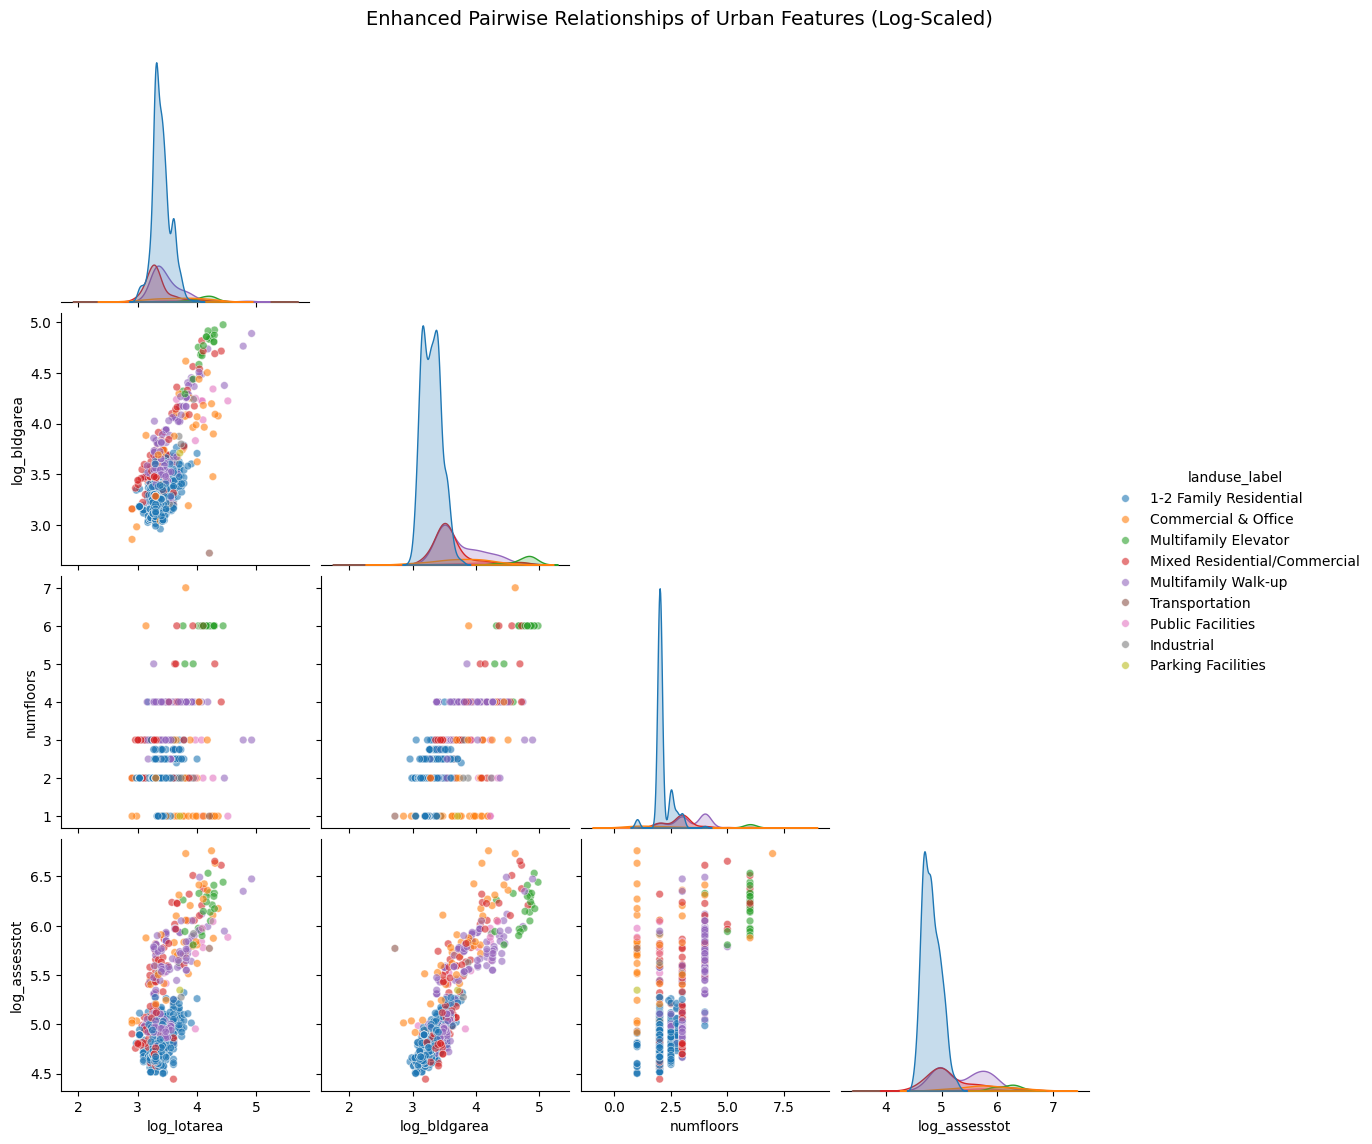

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy and apply log10 to skewed variables
enhanced = pluto.copy()
enhanced = enhanced[(enhanced['lotarea'] > 0) & (enhanced['bldgarea'] > 0) & (enhanced['assesstot'] > 0)]

# Apply log10 transformation
enhanced['log_lotarea'] = np.log10(enhanced['lotarea'])
enhanced['log_bldgarea'] = np.log10(enhanced['bldgarea'])
enhanced['log_assesstot'] = np.log10(enhanced['assesstot'])

# Filter out extreme values for better visuals
filtered = enhanced[
    (enhanced['log_lotarea'] < 5) &       # < 100,000 sq ft
    (enhanced['log_bldgarea'] < 5) &
    (enhanced['log_assesstot'] < 8)       # < $100 million
]

#  Plot
sns.pairplot(
    filtered,
    vars=['log_lotarea', 'log_bldgarea', 'numfloors', 'log_assesstot'],
    hue='landuse_label',
    palette='tab10',
    corner=True,
    plot_kws={'alpha': 0.6, 's': 30},  # smaller, more transparent points
    diag_kind='kde',
    height=2.8
)

plt.suptitle("Enhanced Pairwise Relationships of Urban Features (Log-Scaled)", y=1.02, fontsize=14)
plt.show()



This is a **log-transformed pairplot** of key urban metrics from your NYC PLUTO-style dataset, visualized by **land use type**. The transformation improves readability of skewed features like lot size and assessed value.

---

##  What This Plot Shows

###  **Variables**
| Variable         | Meaning                                       |
|------------------|-----------------------------------------------|
| `log_lotarea`    | Log10 of land lot area (in sq ft)             |
| `log_bldgarea`   | Log10 of building area (in sq ft)             |
| `numfloors`      | Number of floors (building height)            |
| `log_assesstot`  | Log10 of total assessed property value (USD)  |

---

###  **Color Legend** (hue = `landuse_label`)
Each point/curve color shows the property’s land use type (e.g., Residential, Commercial, Public Facilities).

---

##  Interpretation by Section

###  **Diagonal KDEs (top-left to bottom-right)**
- **log_lotarea**: Most land use types cluster between log 3–4.5 (~1,000–30,000 sq ft lots)
- **log_bldgarea**: Similar but more spread — especially for Commercial, Public Facilities
- **numfloors**: Discrete jumps at 1, 2, 3... Most are 2–4 stories
- **log_assesstot**: Most values range between $10,000 and $10 million

---

### **Scatterplots (bottom-left triangle)**

#### `log_lotarea` vs `log_bldgarea`
- **Positive linear trend**: bigger lots → bigger buildings
- **Commercial & Industrial** buildings span larger areas

#### `log_bldgarea` vs `log_assesstot`
- Clear upward slope: **larger buildings are more valuable**
- **Multifamily Elevator & Commercial** properties dominate high-value zone

#### `numfloors` vs others
- **Not a smooth distribution** (as expected — it's discrete)
- **More floors generally = higher value**, but exceptions exist (e.g., small lot but high value in prime location)

---

##  Urban Planning Takeaways

| Insight | Implication |
|--------|-------------|
| Taller + larger buildings → higher assessment | Helps inform **rezoning** strategies |
| Residential lots cluster tightly | Can be used for **standard taxation** or targeting low-rise neighborhoods |
| Commercial & public facilities dominate high-value areas | Useful for **infrastructure investment planning** or PILOT evaluations |
| Public & multifamily show the most range | Reflects **mixed development types** and variability in neighborhood typologies |

---

###  Why Log Transform Helps
- Skews like lot area and assessed value would dominate visuals without transformation
- Log10 scaling **compresses extreme values**, allowing more meaningful comparison
- Makes subtle differences between land uses **visually obvious**



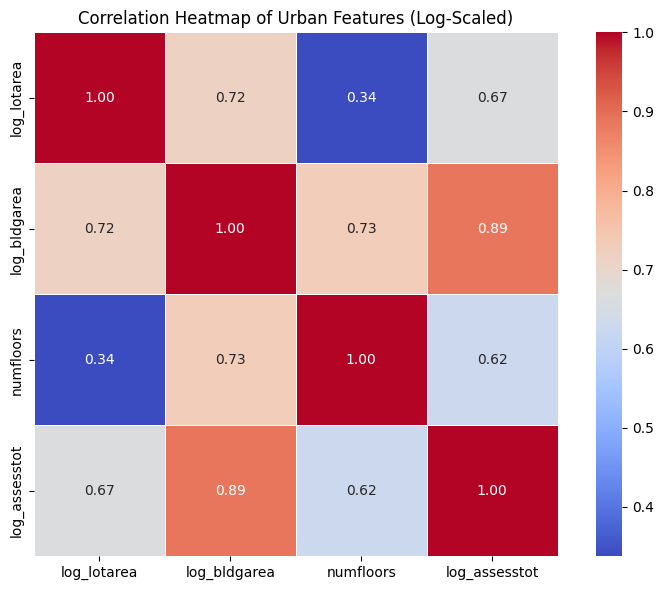

In [28]:


# compute correlation matrix with log-transformed features
corr = filtered[['log_lotarea', 'log_bldgarea', 'numfloors', 'log_assesstot']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Urban Features (Log-Scaled)")
plt.tight_layout()
plt.show()


This is a **correlation heatmap** showing the relationships between key urban features in **log-transformed scale**, calculated from your NYC PLUTO-style dataset.

---

##  What It Shows

Each number represents a **Pearson correlation coefficient** between two variables:

- **+1.00** = perfect positive correlation  
- **0.00** = no correlation  
- **–1.00** = perfect negative correlation

The values range from **0.34 to 0.89**, indicating varying **positive relationships** between variables.

---

##  Feature-by-Feature Interpretation:

| Variables               | Correlation | Interpretation |
|------------------------|-------------|----------------|
| `log_lotarea` & `log_bldgarea` | **0.72** | Larger lots tend to have larger buildings |
| `log_bldgarea` & `log_assesstot` | **0.89** | Strongest relationship — more floor area → higher assessed value |
| `numfloors` & `log_bldgarea` | **0.73** | More floors → more total floor area (expected) |
| `log_lotarea` & `log_assesstot` | **0.67** | Larger lots generally → higher value |
| `numfloors` & `log_assesstot` | **0.62** | Taller buildings tend to be more valuable |
| `numfloors` & `log_lotarea` | **0.34** | Weakest correlation — taller buildings don't necessarily need large lots (e.g., high-rises on small footprints) |

---

##  Key Takeaways for Urban Planning:

1. **Building area is a top driver of value**  
   → Policies that control Floor Area Ratio (FAR) have a strong impact on land value.

2. **Lot size correlates, but less than floor area**  
   → Zoning focused on **bulk and use** may be more impactful than lot size restrictions.

3. **Building height has moderate influence on value**  
   → Especially relevant for **multi-story commercial or residential zoning**.

4. **Log transformation works!**  
   → Without it, extreme values would’ve distorted these relationships.

